In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import utils as ut
from scipy.interpolate import make_lsq_spline, splprep, splev
# import pylab

In [2]:
de = pd.read_csv('./deGenes.txt', delimiter= '\t', header=0, index_col=0)

In [3]:
base_df = pd.read_csv('./allfile_counts.csv', delimiter= '\t', header=0, index_col=0)
df = base_df[de[de['log2FoldChange'].abs() > 2].index.tolist()]

## Testing functions on 1 gene

In [4]:
# splits dataframe of those with and without na and formats them
w_na, wo_na = ut.na_split('ENSSSCG00000000574', base_df)

In [5]:
# performs imputation methods on the split data
poly_df, poly_y, interp_df, interp_y = ut.impute_methods(w_na, wo_na)

## Plotting the spline and polynomial imputations

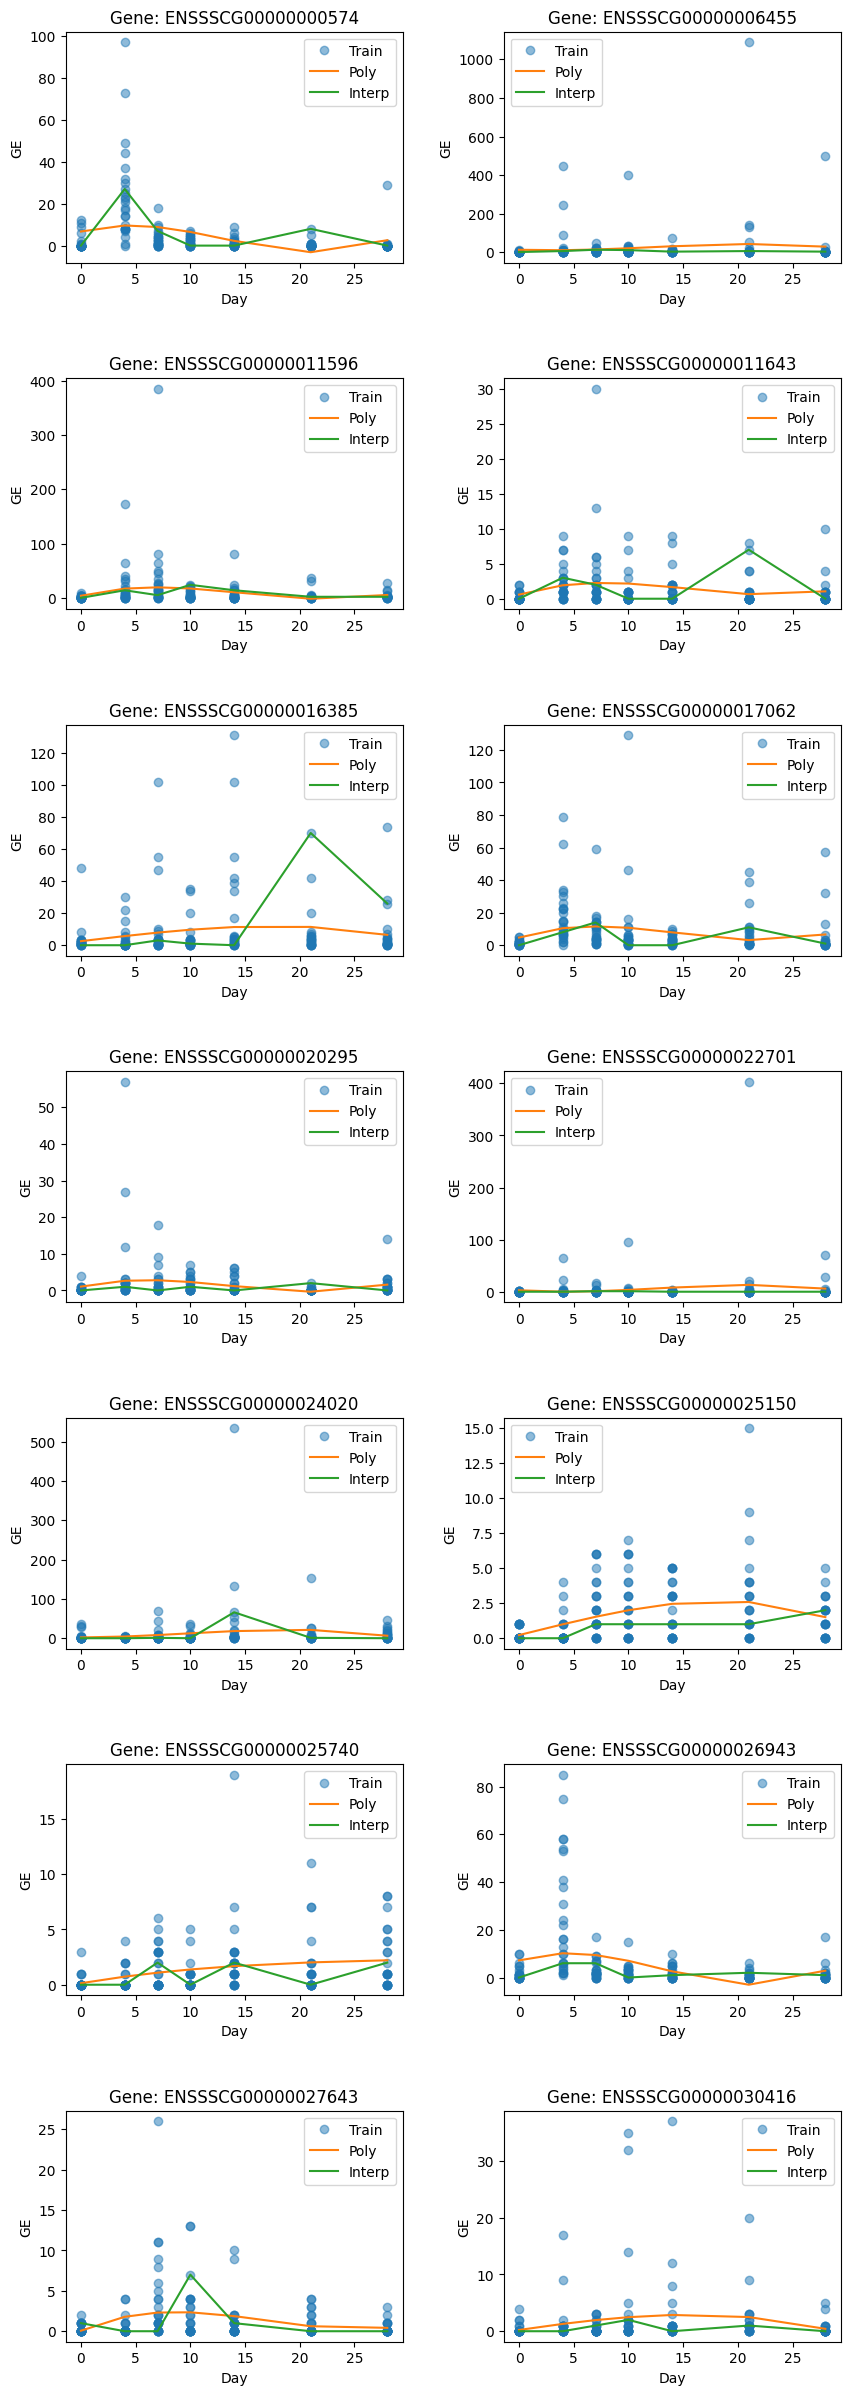

In [6]:
nrows = int(len(df.columns)/2)  # number of rows in subplot grid
ncols = 2  # number of columns in subplot grid
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 30))

fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, gene in enumerate(df.columns):
    row = i // ncols
    col = i % ncols
    ax = axs[row, col]
    
    w_na, wo_na = ut.na_split(gene, base_df)
    poly_df, poly_y, interp_df, interp_y = ut.impute_methods(w_na, wo_na)

    # plot scatter plot
    ax.plot(wo_na['day'], wo_na['ge'], 'o', alpha=0.5)

    # plot poly line
    ax.plot(w_na['day'], poly_y, '-')

    # plot interp line
    ax.plot(w_na['day'], interp_y, '-')

    # add labels and legend
    ax.set_xlabel('Day')
    ax.set_ylabel('GE')
    ax.legend(['Train', 'Poly', 'Interp'])
    ax.set_title(f'Gene: {gene}')

plt.show()
